In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataDIR = 'short'
DS = xr.open_dataset(dataDIR)

In [3]:
#Temperature:
T = (DS.T.values + DS.T0) * ((DS.P.values + DS.PB.values)/DS.P0)**(DS.R_D/DS.CP)

In [4]:
T.shape #days, height, latitude, longtitude

(240, 52, 36, 72)

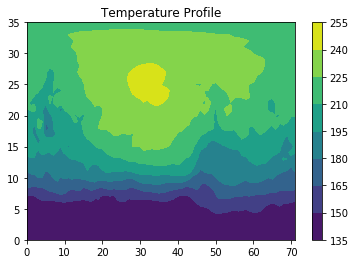

In [5]:
example_data = T[50,5,:, :]
plt.contourf(example_data)
plt.colorbar()
plt.title("Temperature Profile")
plt.show()

In [6]:
albedo = DS.ALBEDO.values

In [7]:
albedo.shape #days, latitude, longtitude

(240, 36, 72)

In [8]:
st = DS.TSK.values

In [9]:
st.shape

(240, 36, 72)

In [10]:
d_c = DS.TAU_OD.values

In [11]:
d_c.shape 

(240, 52, 36, 72)

In [12]:
tsf = DS.TOASW.values #top solar flux

In [13]:
tsf.shape

(240, 36, 72)

In [14]:
bsf = DS.GSW.values #bottom solar flux, ouput

In [15]:
bsf.shape

(240, 36, 72)

Let's combine the data together for one time snapshot, full latitude and longitude:

In [72]:
e_t = [] #equator input and output
#input:
for i in range(36):
    for j in range(72):
        input_array = list(T[3,:,i,j]) #start with temp profile
        input_array+=list(d_c[3,:,i,j]) #add dust profile
        input_array.append(albedo[3,i,j])#add albedo
        input_array.append(st[3,i,j])#add surface temp
        input_array.append(tsf[3,i,j]) #add top solar flux
        input_array.append(bsf[3,i,j])            
        e_t.append(input_array) #appends input to input array

In [73]:
e_t = np.array(e_t)
e_t.shape

(2592, 108)

In [74]:
e_d = pd.DataFrame(e_t) 
e_d

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,145.052505,145.118210,145.034302,144.925522,144.810226,144.634140,144.421860,144.285873,144.390717,144.826294,...,2.415657e-08,1.603531e-08,1.022075e-08,6.162274e-09,3.473062e-09,1.870772e-09,0.511000,144.366058,0.000000,0.000000
1,145.032120,145.095871,145.014099,144.915527,144.811172,144.639297,144.425125,144.283463,144.370926,144.779175,...,2.418449e-08,1.605352e-08,1.023200e-08,6.168662e-09,3.476231e-09,1.872022e-09,0.511000,144.374054,0.000000,0.000000
2,145.005997,145.067337,144.987610,144.899200,144.805862,144.638565,144.423065,144.276138,144.345978,144.725616,...,2.419670e-08,1.606147e-08,1.023692e-08,6.171454e-09,3.477616e-09,1.872569e-09,0.511000,144.377609,0.000000,0.000000
3,144.974365,145.032928,144.955124,144.876755,144.794373,144.632004,144.415802,144.264008,144.316101,144.666122,...,2.419310e-08,1.605912e-08,1.023546e-08,6.170629e-09,3.477207e-09,1.872407e-09,0.511000,144.376678,0.000000,0.000000
4,144.937531,144.992920,144.916946,144.848389,144.776840,144.619690,144.403427,144.247238,144.281586,144.601196,...,2.417375e-08,1.604651e-08,1.022767e-08,6.166205e-09,3.475012e-09,1.871541e-09,0.511000,144.371277,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,216.552307,216.315048,215.960938,215.595612,215.365265,215.396729,215.229431,214.950150,214.643860,214.350906,...,4.437198e-08,2.921381e-08,1.836105e-08,1.078598e-08,5.766621e-09,2.775976e-09,0.408859,216.824097,224.713699,122.219765
2588,216.824081,216.577454,216.215073,215.840378,215.598694,215.603958,215.412247,215.116440,214.796143,214.491760,...,4.438701e-08,2.922361e-08,1.836711e-08,1.078942e-08,5.768326e-09,2.776649e-09,0.406916,217.144958,225.535324,123.104446
2589,217.093124,216.837372,216.466858,216.082275,215.828262,215.805679,215.588867,215.276138,214.941574,214.625626,...,4.440004e-08,2.923210e-08,1.837235e-08,1.079240e-08,5.769804e-09,2.777232e-09,0.404932,217.462555,226.216263,123.916435
2590,217.357605,217.093155,216.714523,216.319763,216.052536,216.000671,215.758133,215.428253,215.079330,214.751801,...,4.441116e-08,2.923936e-08,1.837683e-08,1.079495e-08,5.771067e-09,2.777731e-09,0.402921,217.771591,226.751312,124.648727


In [75]:
e_rem0 = e_d[e_d.iloc[:,106] != 0] #removes rows with 0 top solar flux

In [76]:
e_rem0.iloc[:,107]

360      10.302216
361      10.694859
362      10.241914
363       9.106853
364       7.338049
           ...    
2587    122.219765
2588    123.104446
2589    123.916435
2590    124.648727
2591    125.294891
Name: 107, Length: 1320, dtype: float32

In [77]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(e_rem0, test_size=0.2, random_state=42)

In [78]:
train_set.shape

(1056, 108)

In [79]:
test_set.shape

(264, 108)

In [80]:
train_in = train_set.iloc[:,:107] #training input
train_out = train_set.iloc[:,107] #training output
test_in = test_set.iloc[:,:107] #training input
test_out = test_set.iloc[:,107] #training output

In [81]:
train_in.index #this provides the location of each point according to the date and latitude
indices = np.array(train_in.index)

In [82]:
np.array(train_in)

array([[2.1133389e+02, 2.0929416e+02, 2.0849768e+02, ..., 1.8767029e-01,
        2.2753683e+02, 3.0310608e+02],
       [2.2235109e+02, 2.2583852e+02, 2.3115086e+02, ..., 1.2881599e-01,
        2.1324028e+02, 1.2062143e-02],
       [2.1687448e+02, 2.1490694e+02, 2.1388765e+02, ..., 2.0518422e-01,
        2.2579242e+02, 1.9838985e+02],
       ...,
       [2.1345190e+02, 2.1335916e+02, 2.1309193e+02, ..., 4.2077851e-01,
        2.1299127e+02, 1.9262505e+02],
       [2.4393170e+02, 2.4265059e+02, 2.4183702e+02, ..., 2.0391786e-01,
        2.4817116e+02, 2.3981238e+02],
       [2.3820009e+02, 2.3815402e+02, 2.3779312e+02, ..., 1.6169237e-01,
        2.3675764e+02, 1.7613338e+02]], dtype=float32)

In [83]:
train_in

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
1717,211.333893,209.294159,208.497681,207.999847,207.627228,207.955780,211.211227,213.837769,215.327209,216.485275,...,1.421401e-07,9.695122e-08,6.376942e-08,4.001233e-08,2.343021e-08,1.244264e-08,5.896011e-09,0.187670,227.536835,303.106079
2191,222.351089,225.838516,231.150864,233.391357,233.982513,234.055542,233.872070,233.573471,233.205490,232.774475,...,7.917299e-08,5.398434e-08,3.548851e-08,2.224610e-08,1.300308e-08,6.878514e-09,3.229363e-09,0.128816,213.240280,0.012062
947,216.874481,214.906937,213.887650,213.031265,212.309860,211.645584,211.011169,210.393539,209.785507,209.182877,...,6.977644e-08,4.786463e-08,3.177496e-08,2.025528e-08,1.221471e-08,6.886896e-09,3.712471e-09,0.205184,225.792419,198.389847
1597,241.196625,238.896896,237.777283,236.813354,236.002792,235.257309,234.545181,233.851822,233.169434,232.493591,...,7.731411e-08,5.297817e-08,3.510850e-08,2.231439e-08,1.338429e-08,7.467058e-09,3.941445e-09,0.275957,250.426682,295.317322
796,207.484314,204.780289,203.582169,202.692368,201.976639,201.336029,200.732071,200.149246,199.579712,199.017899,...,8.023719e-08,5.494397e-08,3.637136e-08,2.307397e-08,1.379258e-08,7.642590e-09,3.978290e-09,0.144774,227.795837,269.605591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,224.592056,223.346008,222.716980,222.106720,221.445450,220.883148,220.507385,220.321136,220.280884,220.250549,...,7.417903e-08,5.058973e-08,3.326830e-08,2.086671e-08,1.221058e-08,6.474892e-09,3.057445e-09,0.255985,233.708832,288.046356
2402,234.081192,234.737106,234.917084,234.952621,234.750427,234.460007,234.019135,233.473419,232.881531,232.285049,...,7.773679e-08,5.300263e-08,3.484054e-08,2.183707e-08,1.276083e-08,6.746771e-09,3.163463e-09,0.157217,230.459122,144.275665
2566,213.451904,213.359161,213.091934,212.746613,212.458176,212.465775,212.405548,212.221207,212.017975,211.811279,...,6.432975e-08,4.390695e-08,2.891066e-08,1.817380e-08,1.067962e-08,5.713860e-09,2.755153e-09,0.420779,212.991272,192.625046
2104,243.931702,242.650589,241.837021,241.045166,240.332153,239.650070,238.981522,238.320923,237.664154,237.007462,...,6.344094e-08,4.332407e-08,2.855243e-08,1.797641e-08,1.059450e-08,5.703124e-09,2.788739e-09,0.203918,248.171158,239.812378


Let's try linear regression

In [84]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_in, train_out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
from sklearn.metrics import mean_squared_error

train_pred = lin_reg.predict(train_in) #prediction
lin_mse = mean_squared_error(train_out, train_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse 

10.626774

In [86]:
train_in.shape

(1056, 107)

In [87]:
train_pred.shape

(1056,)

In [88]:
train_pred

array([204.51831  , -14.2092285, 140.45386  , ..., 108.613525 ,
       183.8103   , 127.343506 ], dtype=float32)

In [89]:
train_out = np.array(train_out)

In [90]:
train_out.shape

(1056,)

In [91]:
np.average(train_pred)

163.43176

In [93]:
pred_contour = np.full((36, 72), np.nan)
lat_list = []
long_list = []
for i in range(len(indices)):
    lat_point = indices[i]//72
    long_point = indices[i]%72
    lat_list.append(lat_point)
    long_list.append(long_point)
    pred_contour[lat_point][long_point] = train_pred[i]
lat_list = np.array(lat_list)
long_list = np.array(long_list)

out_contour = np.full((36, 72), np.nan)
for i in range(len(indices)):
    lat_point = indices[i]//72
    long_point = indices[i]%72
    out_contour[lat_point][long_point] = train_out[i]    

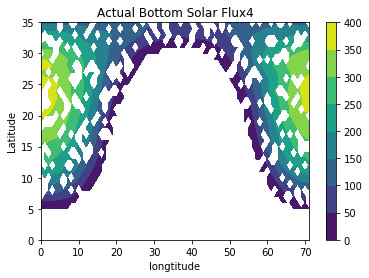

<Figure size 432x288 with 0 Axes>

In [94]:
plt.contourf(out_contour)
plt.colorbar()
plt.title("Actual Bottom Solar Flux4")
plt.xlabel("longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Actual")

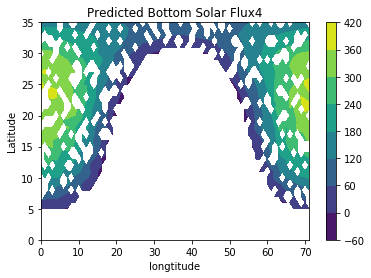

<Figure size 432x288 with 0 Axes>

In [95]:
plt.contourf(pred_contour)
plt.colorbar()
plt.title("Predicted Bottom Solar Flux4")
plt.xlabel("longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Predicted")

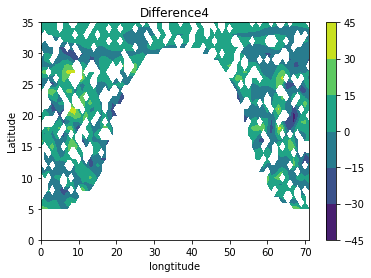

In [96]:
plt.contourf(pred_contour - out_contour)
plt.colorbar()
plt.title("Difference4")
plt.xlabel("longtitude")
plt.ylabel("Latitude")
plt.show()

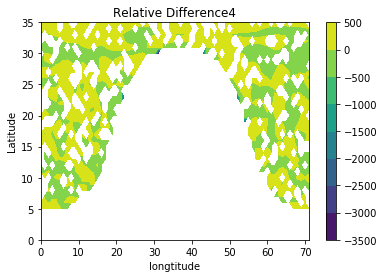

In [97]:
plt.contourf((pred_contour - out_contour)/out_contour)
plt.colorbar()
plt.title("Relative Difference4")
plt.xlabel("longtitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
e_rem0

In [ ]:
indices

See full unmodified latitude-longtitude map:

In [ ]:
f_index = np.array(e_d.index)
f_index

In [ ]:
full_out = np.full((36, 72), np.nan)
for i in range(len(f_index)):
    lat_point = f_index[i]//72
    long_point = f_index[i]%72
    full_out[lat_point][long_point] = e_d.iloc[:,106][i
                                                     ]   

In [ ]:
plt.contourf(full_out)
plt.colorbar()
plt.title("Full Bottom Solar Flux Map")
plt.xlabel("longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Full")